In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder

In [65]:
sns.set_style("whitegrid")

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
print(train.shape)
print(test.shape)

(20758, 18)
(13840, 17)


In [5]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
train["Gender"].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

<Axes: >

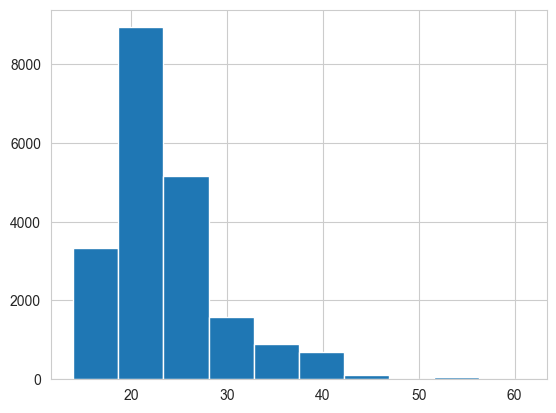

In [8]:
train["Age"].hist()

<Axes: >

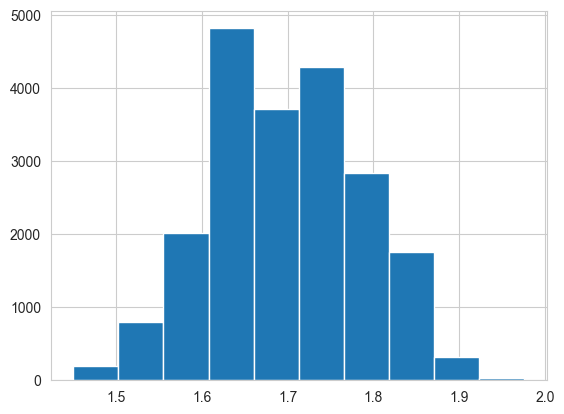

In [9]:
train["Height"].hist()

<Axes: >

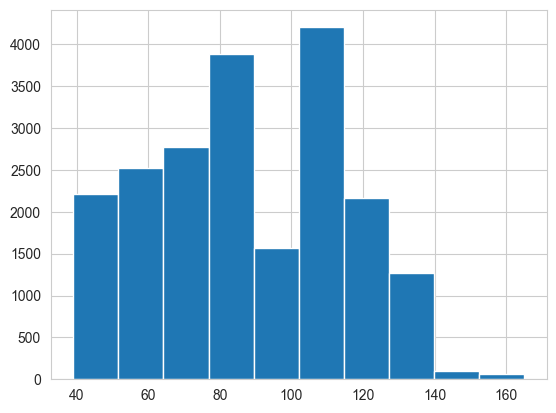

In [11]:
train["Weight"].hist()

In [12]:
train["family_history_with_overweight"].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

In [13]:
train["FAVC"].value_counts()

FAVC
yes    18982
no      1776
Name: count, dtype: int64

<Axes: >

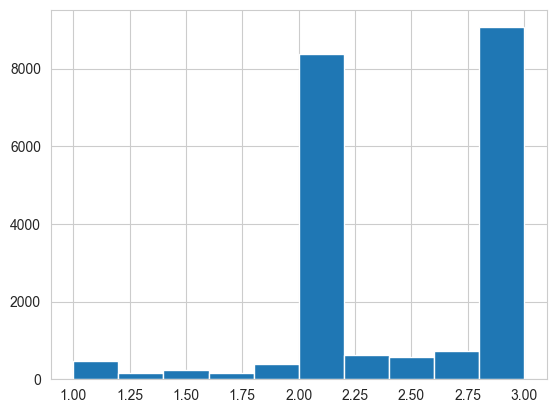

In [14]:
train["FCVC"].hist()

In [21]:
train[(train["FCVC"] != 2.0) & (train["FCVC"] != 3.0)].head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II


<Axes: >

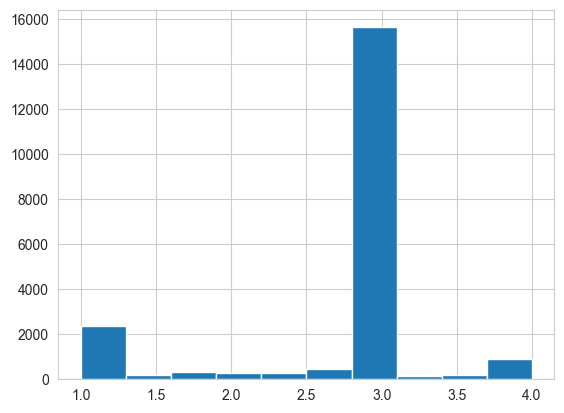

In [15]:
train["NCP"].hist()

In [22]:
train["CAEC"].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [23]:
train["SMOKE"].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

<Axes: >

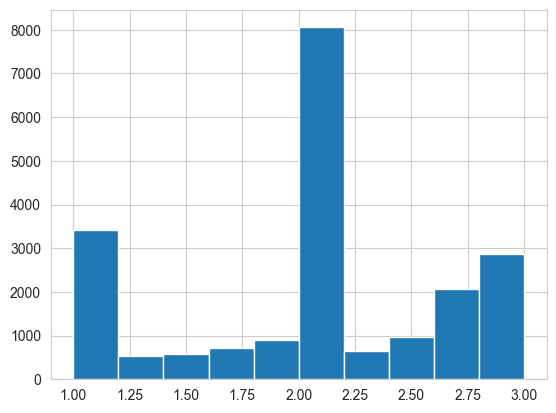

In [24]:
train["CH2O"].hist()

In [25]:
train["SCC"].value_counts()

SCC
no     20071
yes      687
Name: count, dtype: int64

<Axes: >

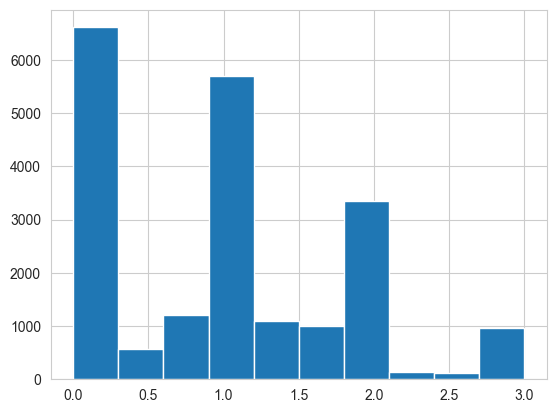

In [26]:
train["FAF"].hist()

<Axes: >

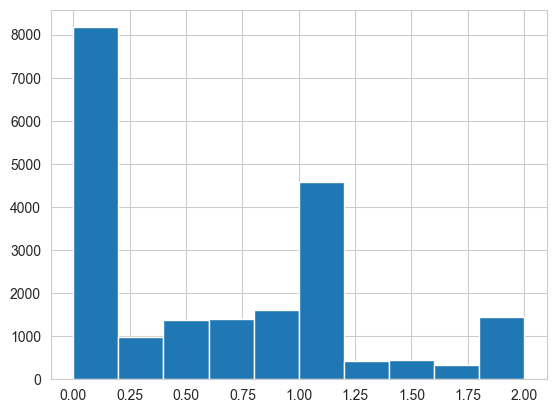

In [27]:
train["TUE"].hist()

In [28]:
train["CALC"].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [29]:
train["MTRANS"].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [30]:
train["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

<Axes: xlabel='NObeyesdad'>

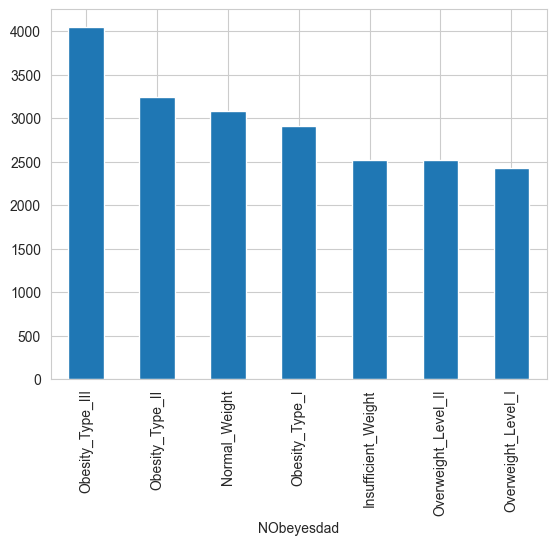

In [34]:
train["NObeyesdad"].value_counts().plot(kind="bar")

In [61]:
train[["NObeyesdad", "MTRANS"]].value_counts().index.to_list()

[('Obesity_Type_III', 'Public_Transportation'),
 ('Normal_Weight', 'Public_Transportation'),
 ('Obesity_Type_II', 'Public_Transportation'),
 ('Insufficient_Weight', 'Public_Transportation'),
 ('Obesity_Type_I', 'Public_Transportation'),
 ('Overweight_Level_I', 'Public_Transportation'),
 ('Overweight_Level_II', 'Public_Transportation'),
 ('Obesity_Type_II', 'Automobile'),
 ('Overweight_Level_II', 'Automobile'),
 ('Obesity_Type_I', 'Automobile'),
 ('Overweight_Level_I', 'Automobile'),
 ('Normal_Weight', 'Automobile'),
 ('Insufficient_Weight', 'Automobile'),
 ('Normal_Weight', 'Walking'),
 ('Overweight_Level_I', 'Walking'),
 ('Overweight_Level_II', 'Walking'),
 ('Insufficient_Weight', 'Walking'),
 ('Obesity_Type_I', 'Walking'),
 ('Normal_Weight', 'Motorbike'),
 ('Normal_Weight', 'Bike'),
 ('Overweight_Level_I', 'Bike'),
 ('Overweight_Level_I', 'Motorbike'),
 ('Obesity_Type_II', 'Walking'),
 ('Overweight_Level_II', 'Bike'),
 ('Insufficient_Weight', 'Motorbike'),
 ('Obesity_Type_I', 'Motorb

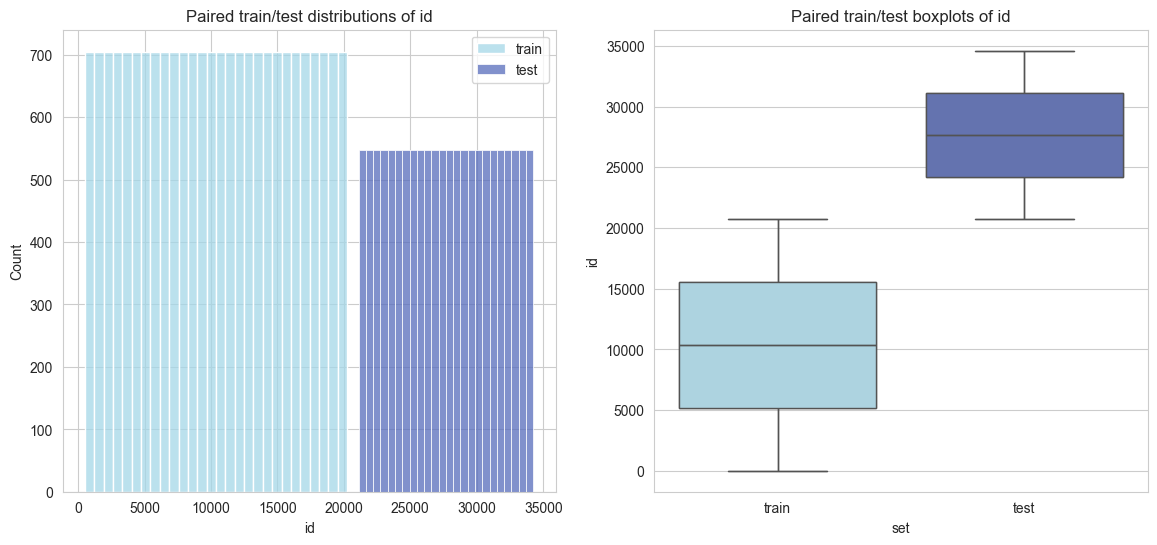

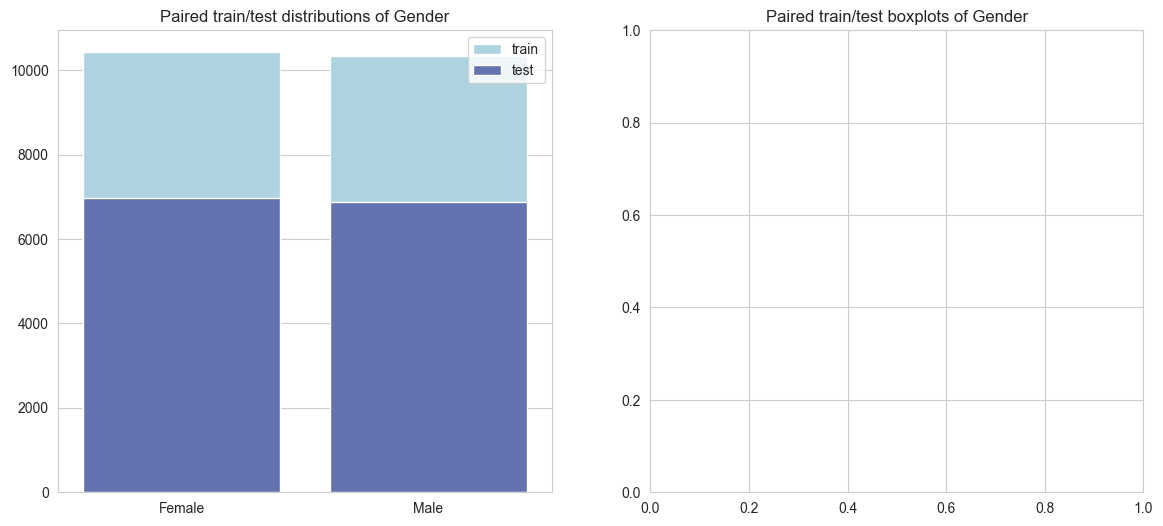

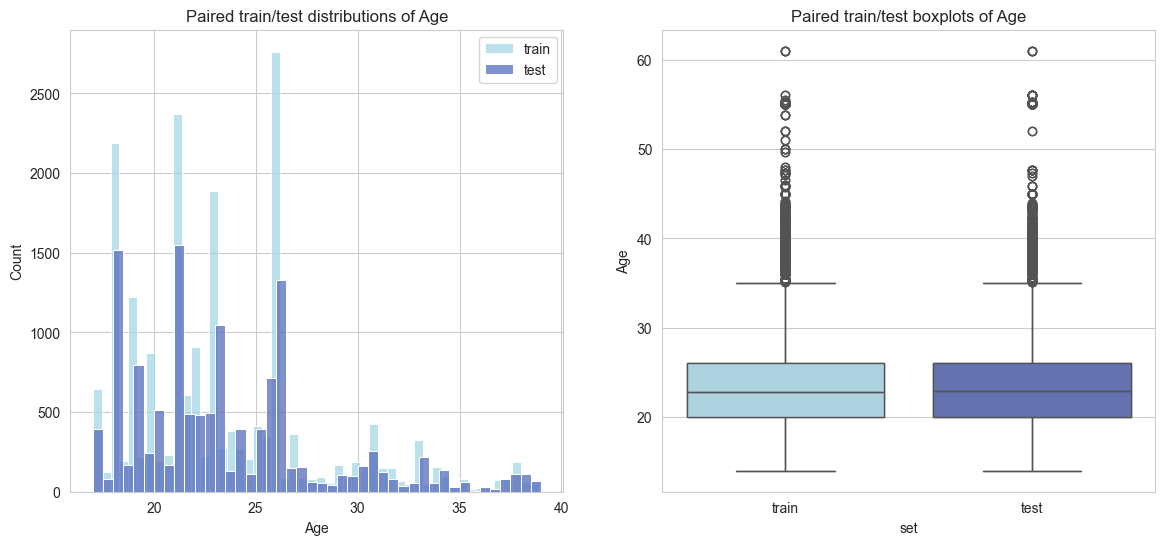

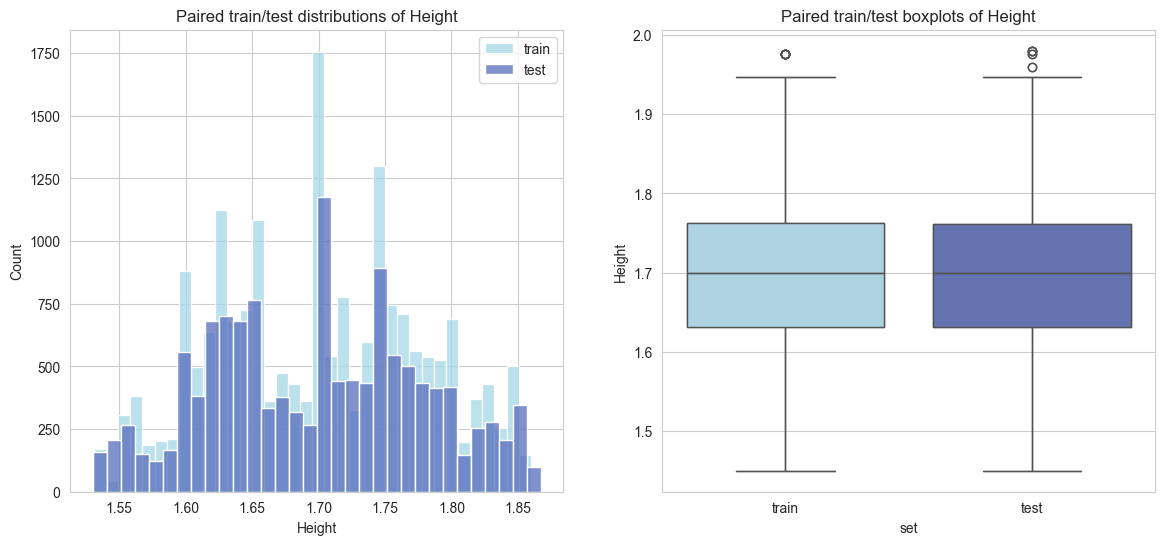

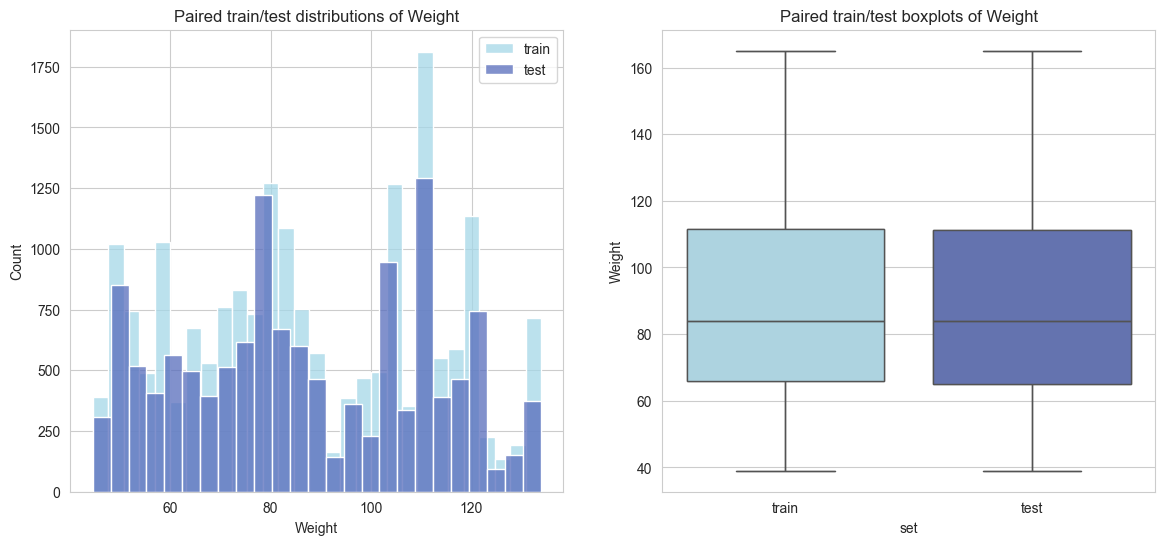

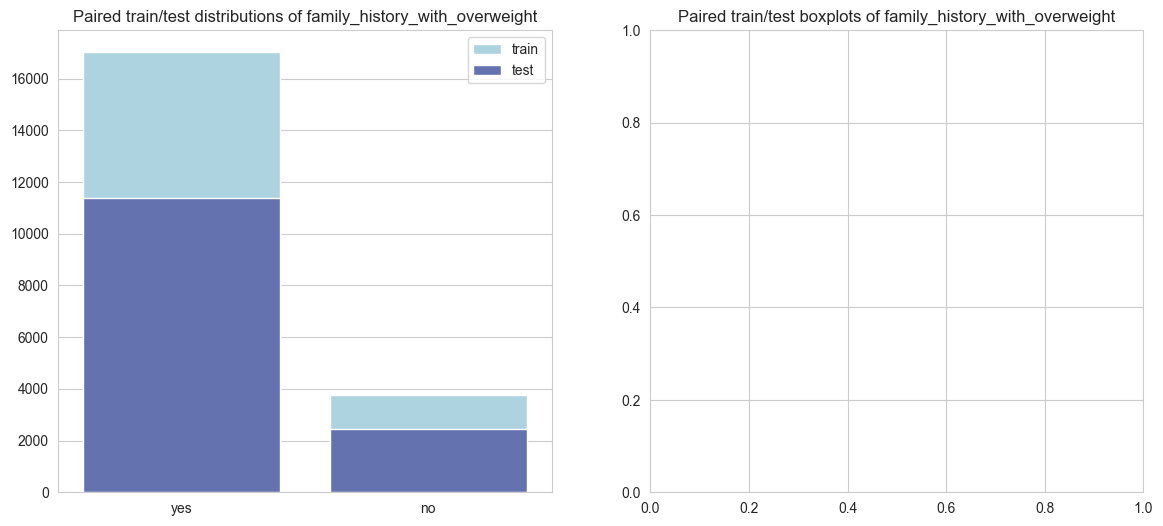

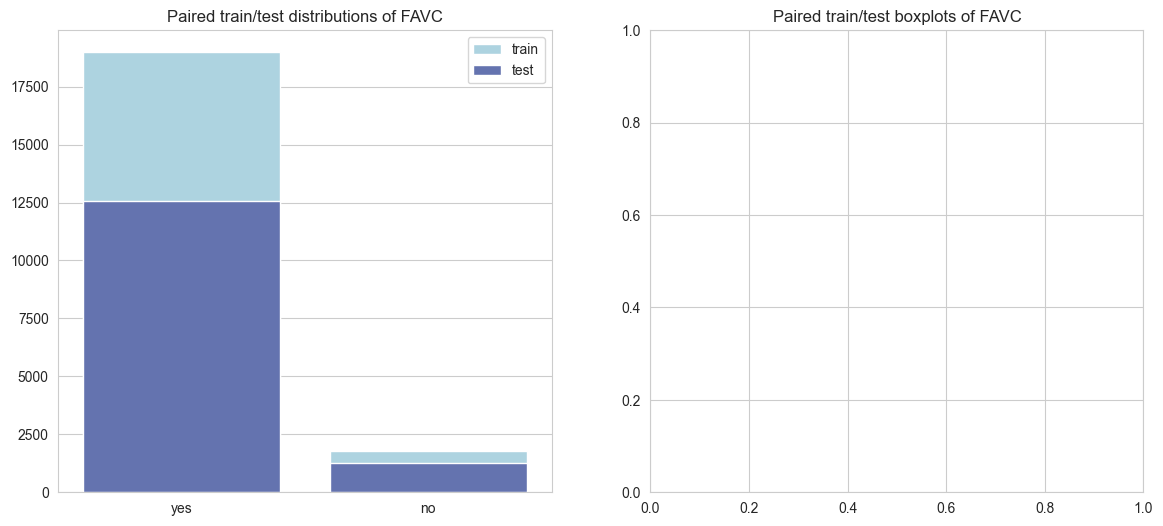

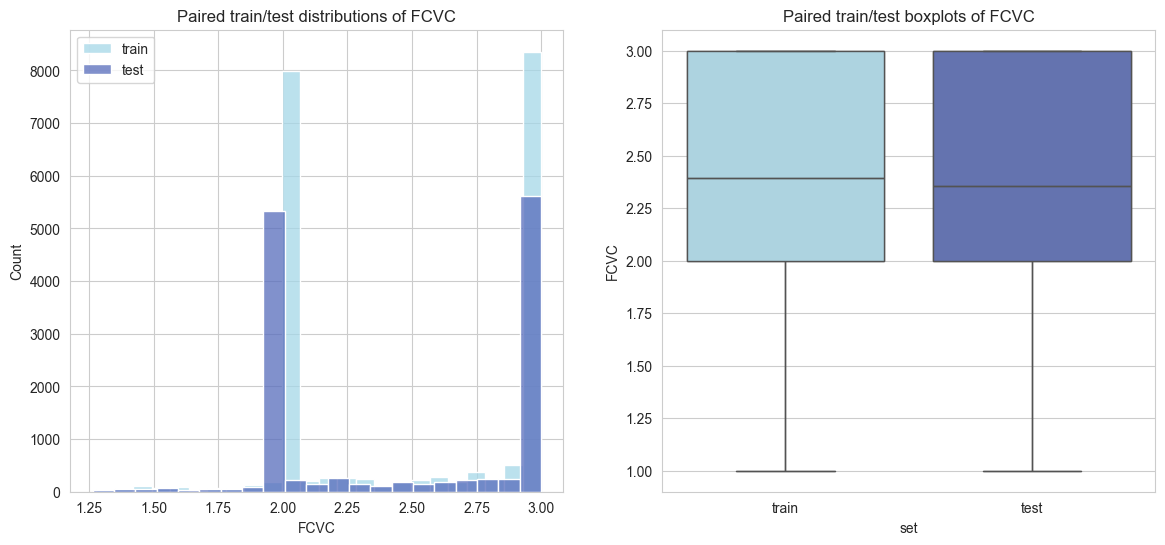

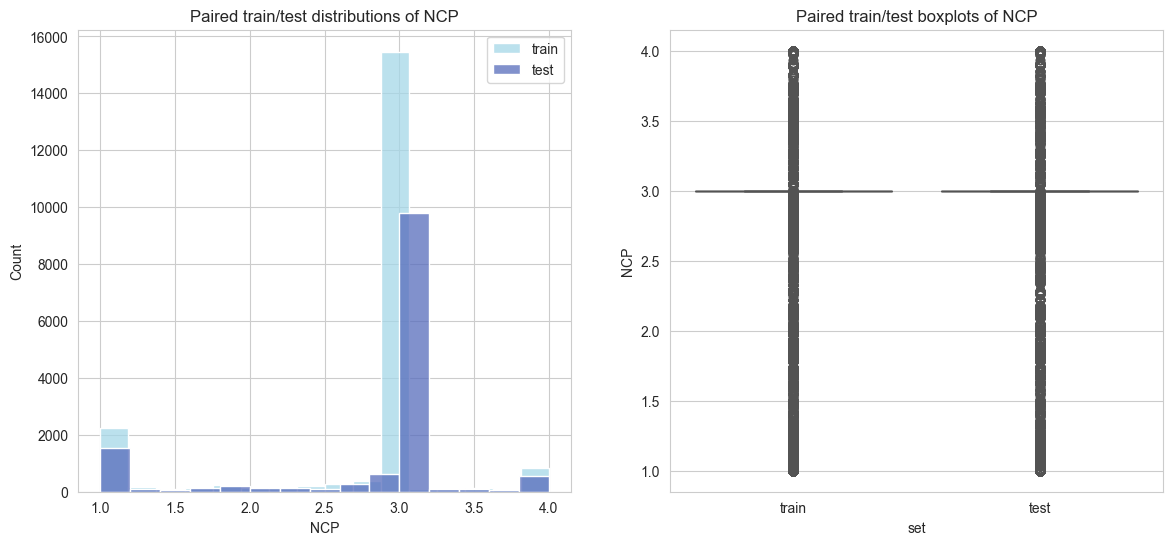

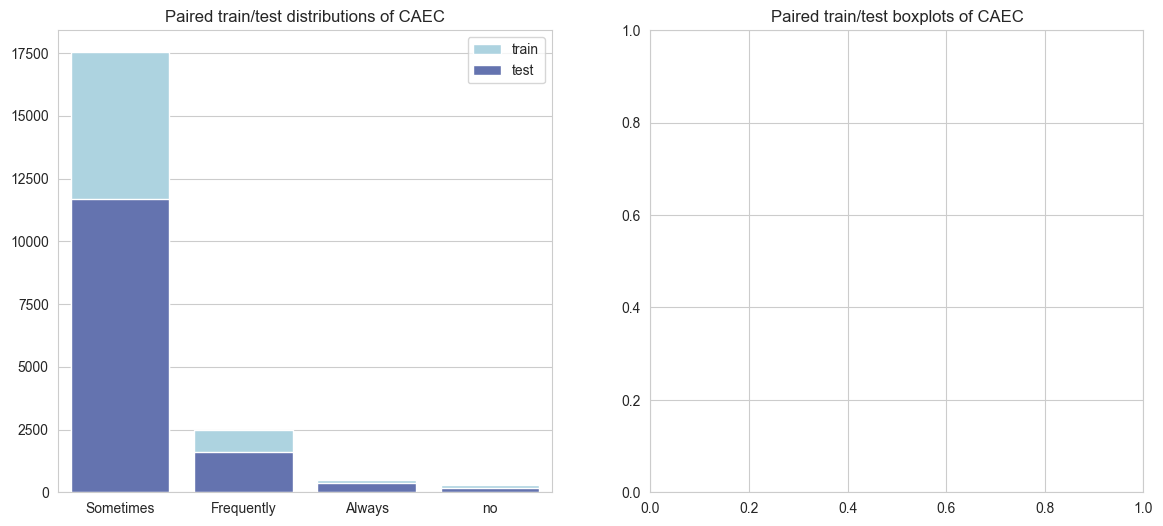

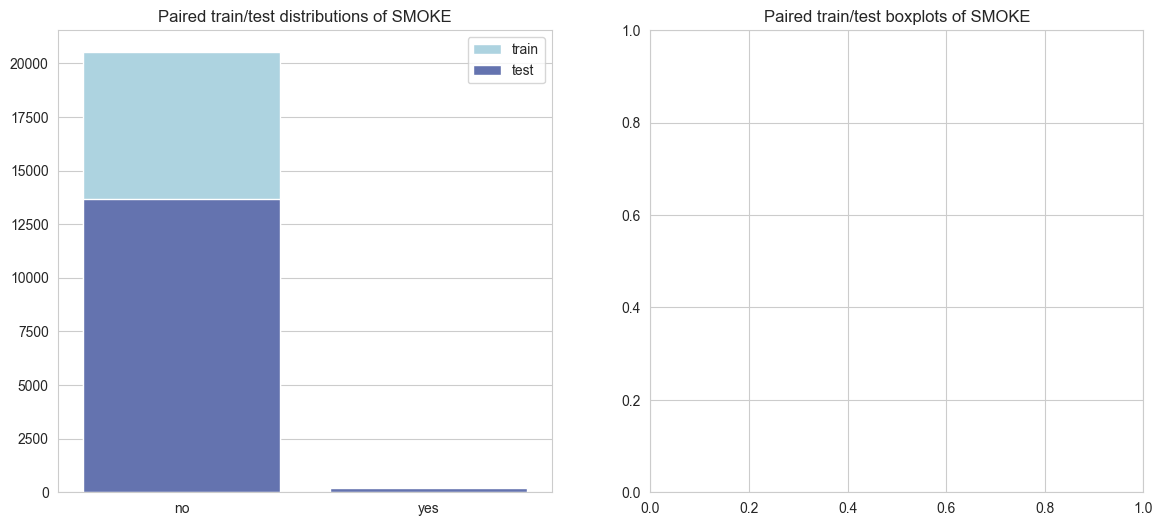

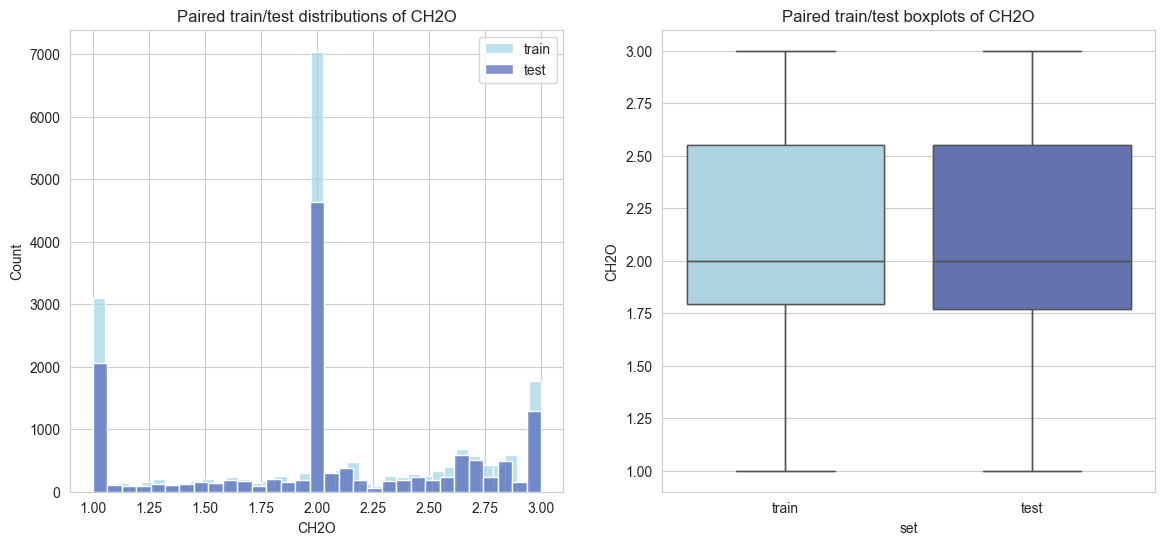

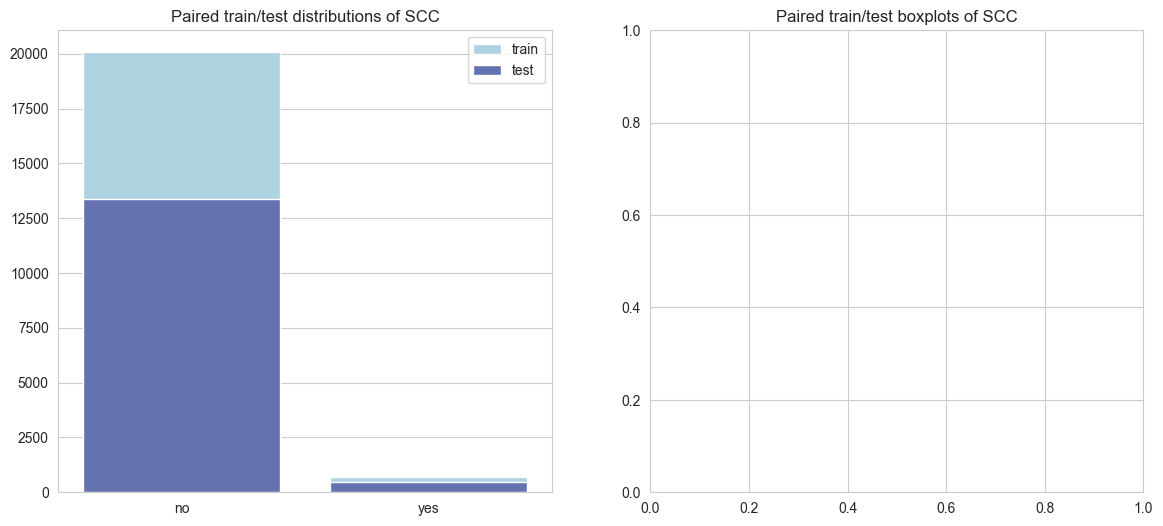

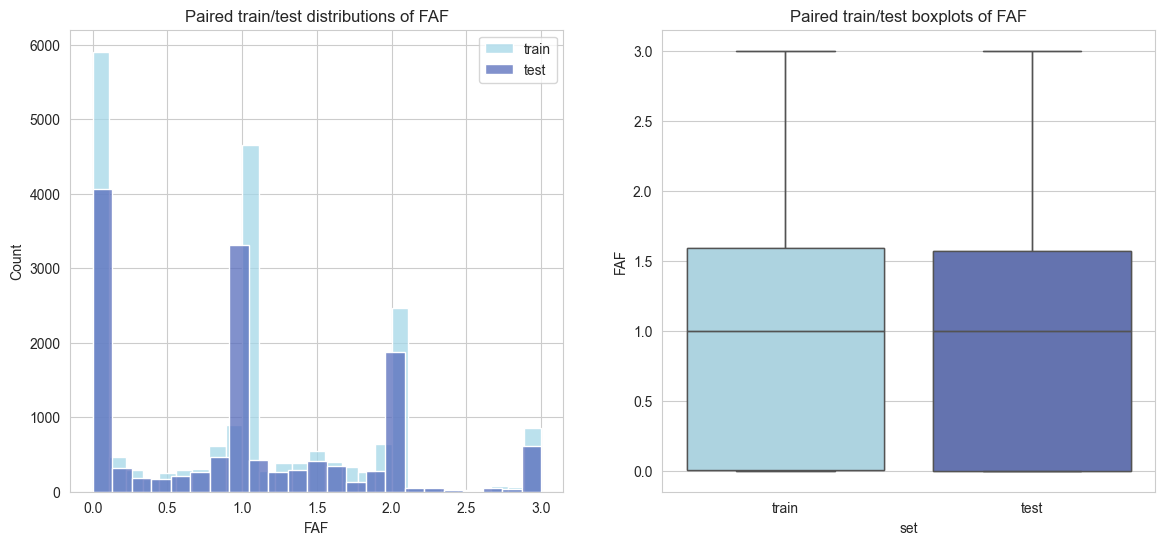

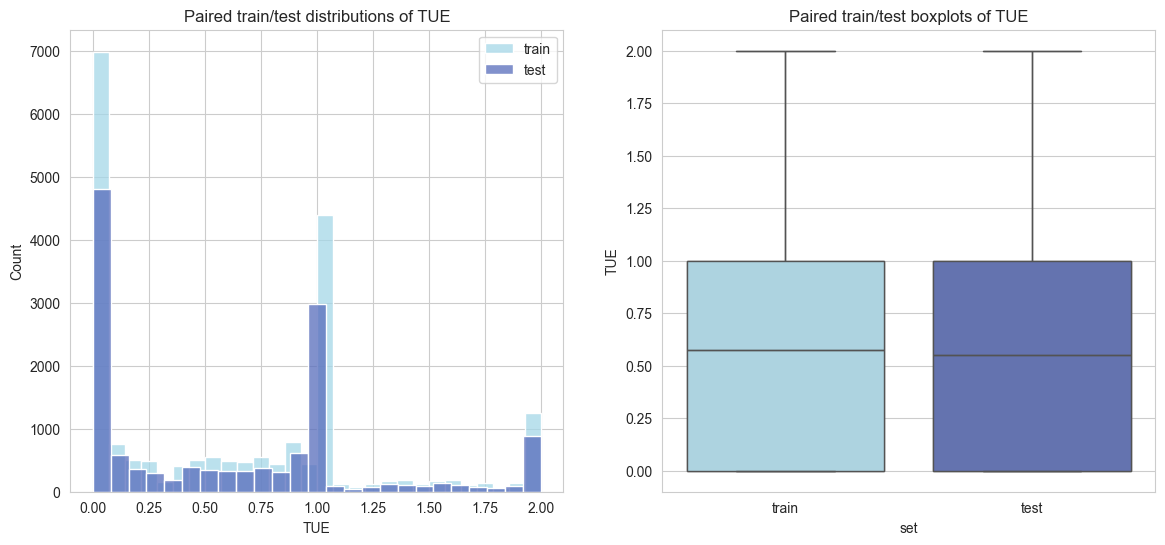

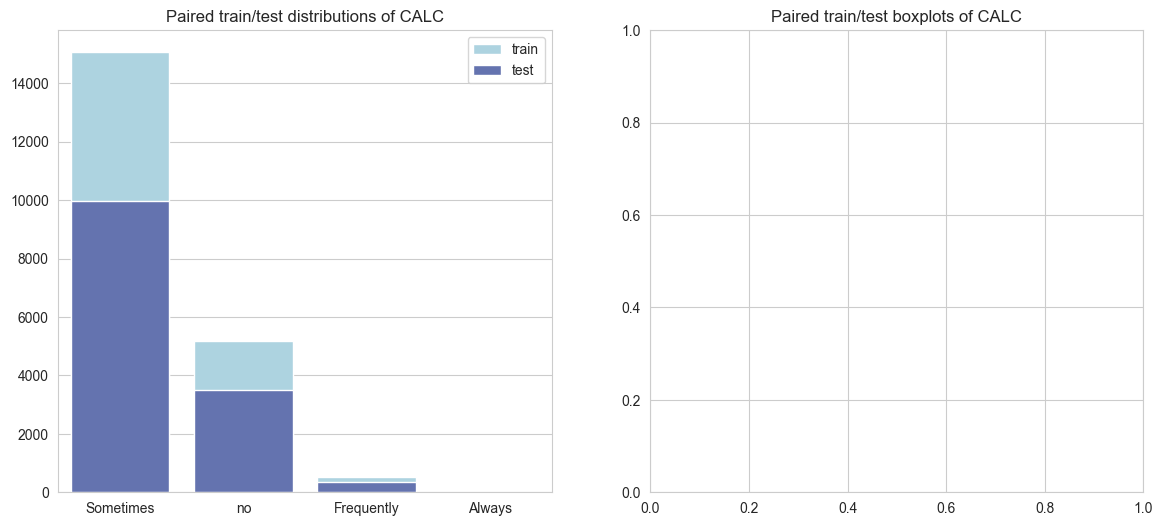

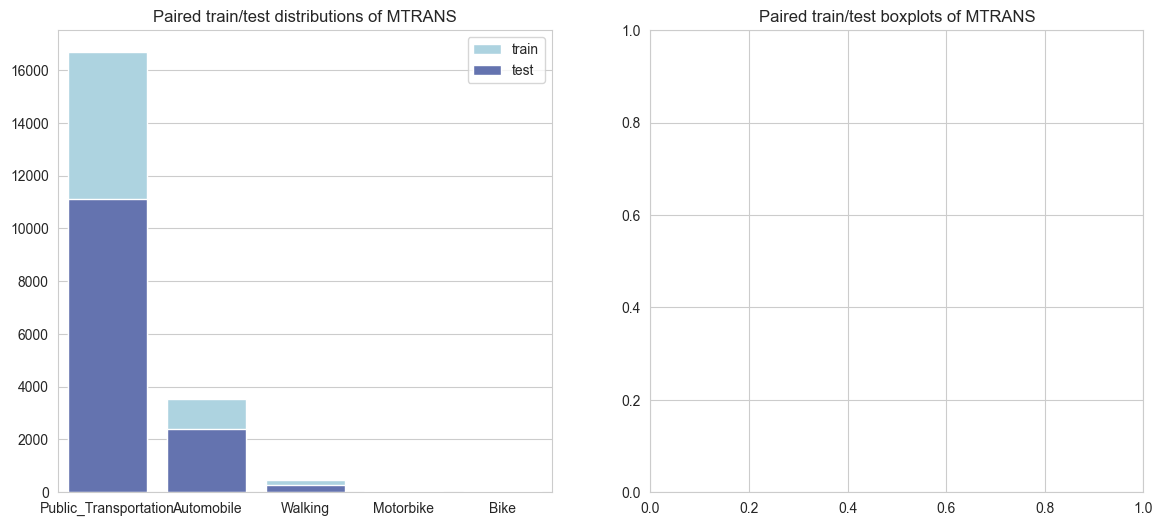

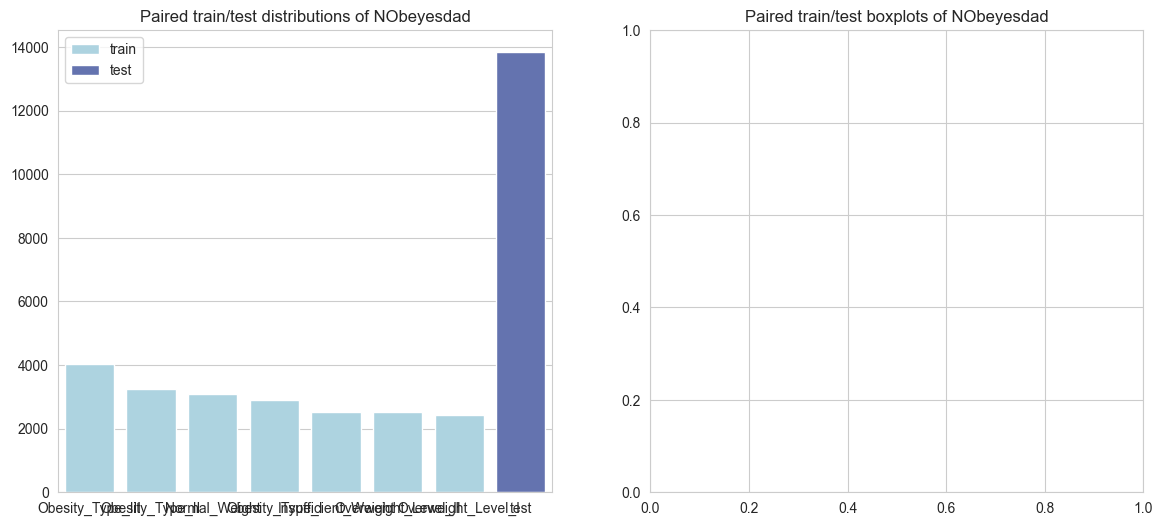

In [66]:
def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df[hue] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        # Filter 'selection' to include only the central 95% of the data
        if selection.dtype.name != "object":
            q_025, q_975 = np.percentile(selection, [2.5, 97.5])
            selection_filtered = selection[(selection >= q_025) & (selection <= q_975)]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            warnings.simplefilter("ignore", category=UserWarning)
            if data_df[feature].dtype.name == "object":
                sns.barplot(x=selection.value_counts().index.to_list(), y=selection.value_counts().values, color=palette[i], ax=axes[0], label=s)
                # plt.pie(data_df[[feature, "set"]].value_counts().values, labels=data_df[[feature, "set"]].value_counts().index, autopct='%1.1f%%', colors=palette, startangle=90, counterclock=False)
                sns.boxplot(x=hue, y=feature, data=pd.DataFrame({hue: [], feature: []}), palette=palette, ax=axes[1])
            else:
                sns.histplot(selection_filtered, color=palette[i], ax=axes[0], label=s)
                sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
    axes[0].set_title(f"Paired train/test distributions of {feature}")
    if data_df[feature].dtype.name != "object":
        axes[1].set_title(f"Paired train/test boxplots of {feature}")
    else:
        # axes[1].set_title(f"Paired train/test pie charts of {feature}")
        axes[1].set_title(f"Paired train/test boxplots of {feature}")
    axes[0].legend()
    #axes[1].legend()
    plt.show()

color_list = ["#A5D7E8", "#576CBC", "#10376D", "#003447"]
for feature in train.columns:
    plot_distribution_pairs(train, test, feature, palette=color_list)

In [68]:
train_corr = train.copy()
for feature in train.columns:
    if train[feature].dtype.name == "object":
        train_corr = train_corr.drop(feature, axis=1)


In [88]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(train["NObeyesdad"].values.reshape(-1, 1))
train_corr = pd.concat([train_corr, pd.DataFrame(one_hot_encoder.transform(train["NObeyesdad"].values.reshape(-1, 1)).toarray(), columns=one_hot_encoder.categories_)], axis=1)

<Axes: >

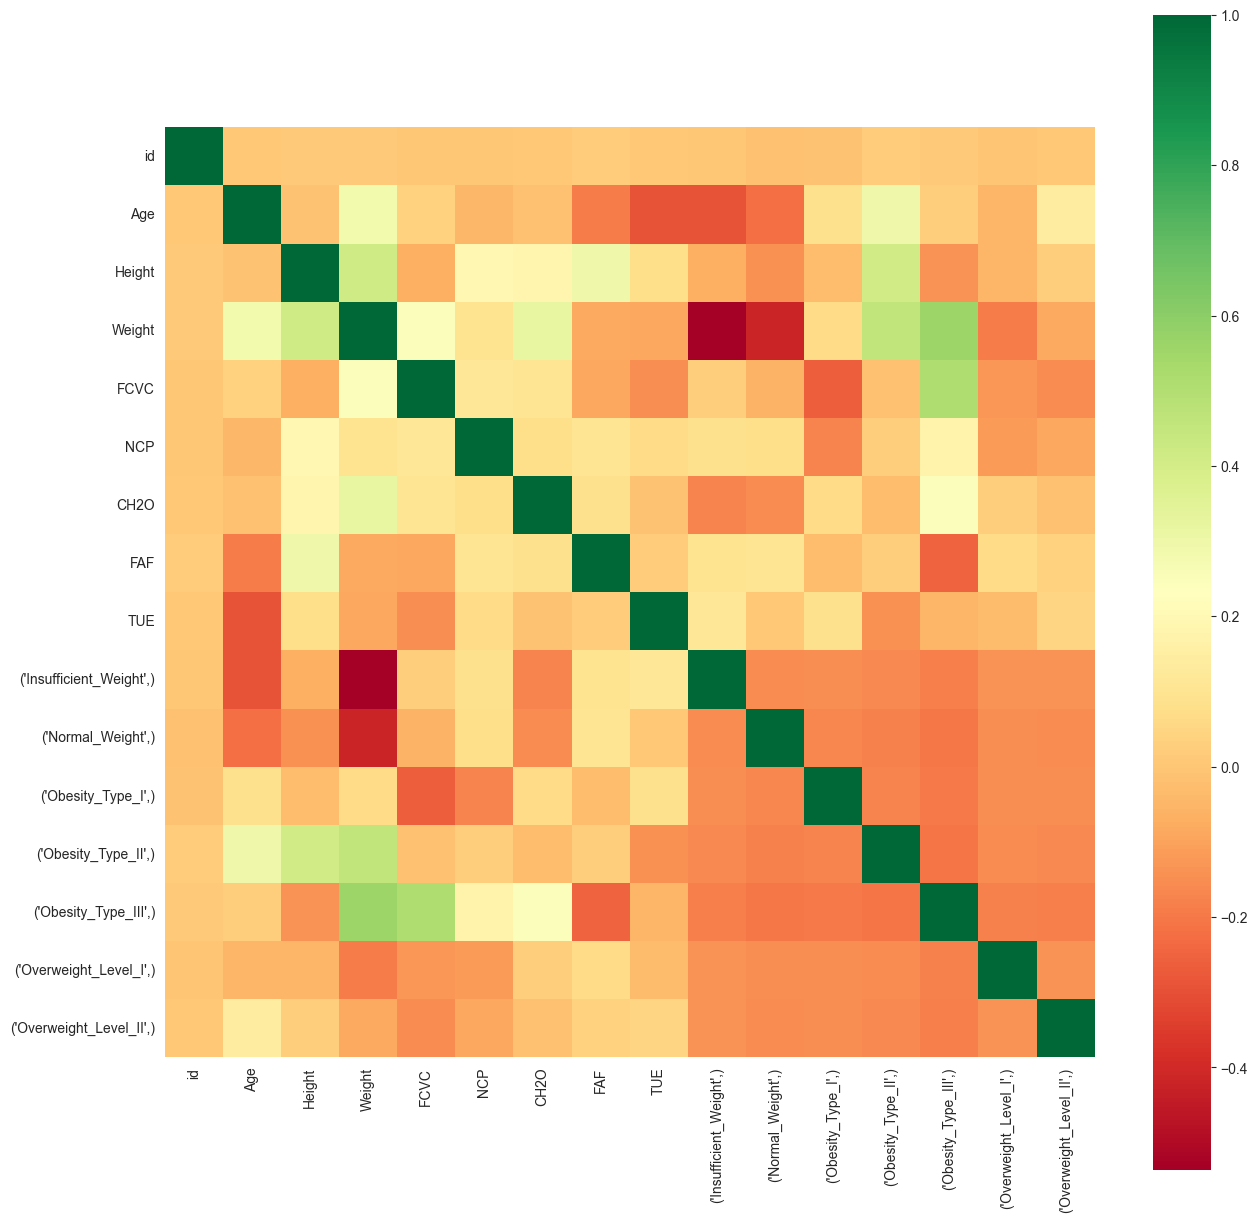

In [89]:
sns.heatmap(train_corr.corr(), square=True, cmap="RdYlGn", ax=plt.subplots(figsize=(15, 15))[1])